In [1]:
import pandas as pd

# Correct path based on your folder
data = pd.read_csv("../data/archive/KDDTrain+.txt", header=None)

print("Dataset shape:", data.shape)
data.head()


Dataset shape: (125973, 43)


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [10]:
data[41].value_counts(normalize=True)


41
normal             0.534583
neptune            0.327165
satan              0.028840
ipsweep            0.028570
portsweep          0.023267
smurf              0.021005
nmap               0.011852
back               0.007589
teardrop           0.007081
warezclient        0.007065
pod                0.001596
guess_passwd       0.000421
buffer_overflow    0.000238
warezmaster        0.000159
land               0.000143
imap               0.000087
rootkit            0.000079
loadmodule         0.000071
ftp_write          0.000064
multihop           0.000056
phf                0.000032
perl               0.000024
spy                0.000016
Name: proportion, dtype: float64

In [13]:
data[0].value_counts().head()


0
0    115955
1      1989
2       843
3       557
4       351
Name: count, dtype: int64

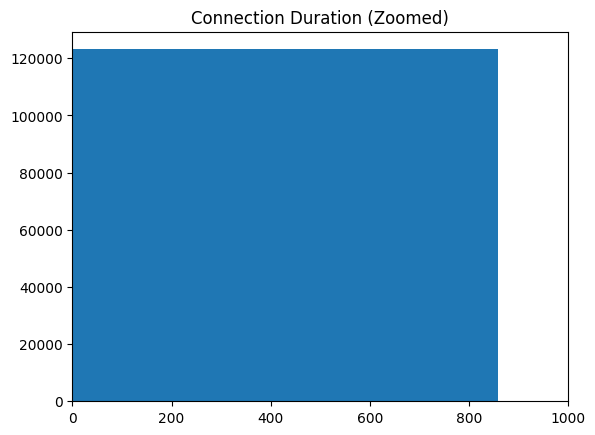

In [24]:
import matplotlib.pyplot as plt
plt.hist(data[0], bins=50)
plt.xlim(0, 1000)
plt.title("Connection Duration (Zoomed)")
plt.show()



In [25]:
data[0].value_counts().head(10)


0
0     115955
1       1989
2        843
3        557
4        351
5        298
27       197
6        193
28       181
7        127
Name: count, dtype: int64

In [26]:
pd.crosstab(data[0] == 0, data[41])


41,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
0,,,,,,,,,,,,,,,,,,,,,
False,40,22,4,4,2,63,0,6,5,1,...,2,0,1417,6,116,0,2,0,351,17
True,916,8,4,49,9,3536,18,3,2,41213,...,2,201,1514,4,3517,2646,0,892,539,3


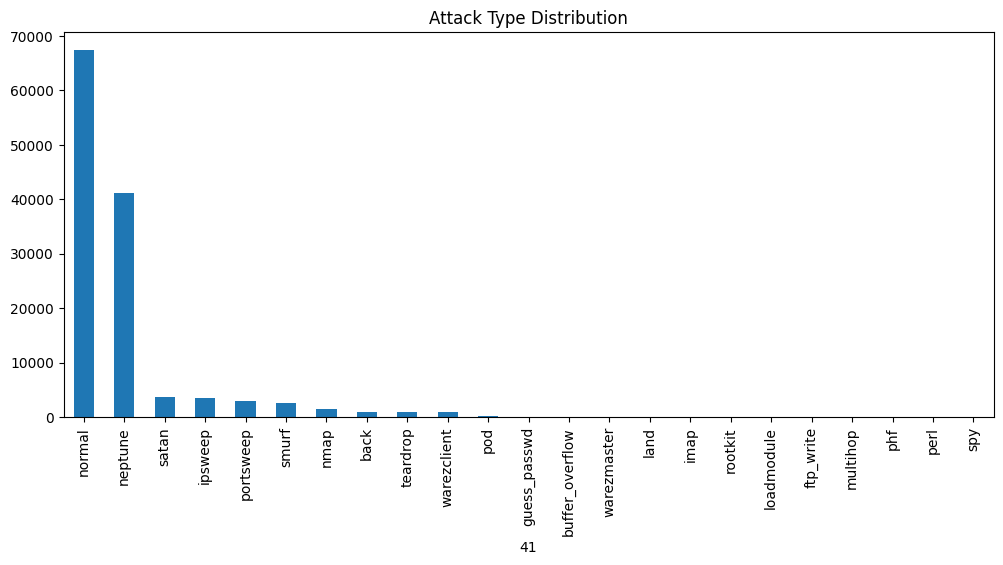

In [27]:
import matplotlib.pyplot as plt

data[41].value_counts().plot(kind="bar", figsize=(12,5))
plt.title("Attack Type Distribution")
plt.xticks(rotation=90)
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()
data[1] = lc.fit_transform(data[1])
data[2] = lc.fit_transform(data[2])
data[3] = lc.fit_transform(data[3])

In [1]:
from sklearn.preprocessing import StandardScaler
x = data.drop(columns = 41)

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)


NameError: name 'data' is not defined

In [46]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    contamination=0.5,
    random_state=42
)

model.fit(x_scaled)

predictions = model.predict(x_scaled)


In [47]:
import numpy as np

np.unique(predictions, return_counts = True)

(array([-1,  1]), array([62986, 62987]))

In [48]:
data['anomaly'] = predictions

pd.crosstab(data['anomaly'],data[42])

42,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
anomaly,,,,,,,,,,,,,,,,,,,,,
-1,66,62,54,65,79,81,96,118,106,194,...,729,449,664,3979,2350,2996,16729,7263,11166,14846
1,0,0,0,0,0,0,0,0,0,0,...,0,2,10,11,43,78,3938,3021,8173,47711


In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(x_scaled)



In [ ]:
# train again
# train again using pca which reduces the dimensions and train agian with consider of 0.05% of the analolys 
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators = 100,
    contamination = 0.05,
    random_state = 42 
)

model.fit(x_pca)
predictions = model.predict(x_pca)


In [51]:
data['anamoly_pca'] = predictions

pd.crosstab(data['anamoly_pca'],data[42])

42,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
anamoly_pca,,,,,,,,,,,,,,,,,,,,,
-1,66,62,54,65,79,78,55,50,23,54,...,151,74,87,1436,407,283,321,327,1264,1300
1,0,0,0,0,0,3,41,68,83,140,...,578,377,587,2554,1986,2791,20346,9957,18075,61257


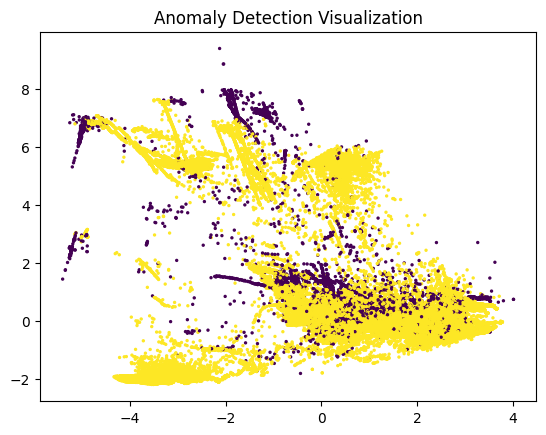

In [52]:
import matplotlib.pyplot as plt

plt.scatter(x_pca[:,0], x_pca[:,1], c=predictions, s=2)
plt.title("Anomaly Detection Visualization")
plt.show()


In [ ]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")

print("Saved successfully")
